In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors
%matplotlib inline
import seaborn as sns
sns.set_style("white")


#import plotly
#import plotly.graph_objs as go

import webcolors
from colorharmonies import Color, complementaryColor, triadicColor, splitComplementaryColor, tetradicColor, analogousColor, monochromaticColor

import cv2 #openCV library

from sklearn.cluster import KMeans
from sklearn.metrics import balanced_accuracy_score
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import NearestNeighbors

#pd.set_option("display.max_rows", None)

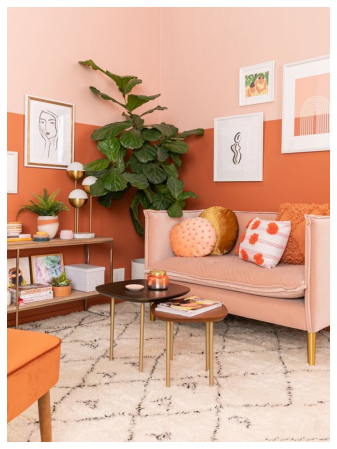

In [98]:
interior_photo = cv2.imread("images/livingroom3.jpg")
interior_photo = cv2.cvtColor(interior_photo, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(interior_photo)

### fix RGB colors of clustered photo - now showing in BRG

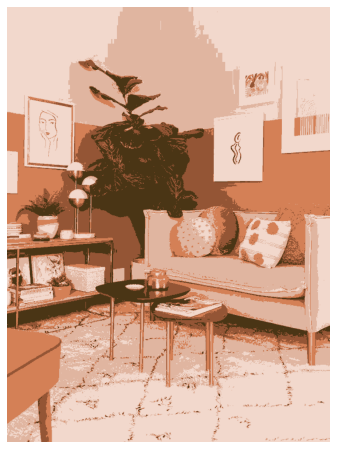

In [99]:
#def clusters_photo(name:str, K=4): #input "name of photo" and amount of clusters
#interior_photo_1 = cv2.imread("images/livingroom2.jpg") #call import_photo function
#cv2.cvtColor(interior_photo_1, cv2.COLOR_BGR2RGB)
pixels = interior_photo.reshape((-1,3))

    # convert to np.float32
pixels = np.float32(pixels)

    # define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    #K = 5 
ret,label,center=cv2.kmeans(pixels,5,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res = res.reshape((interior_photo.shape))
    
plt.figure(figsize=(8,8))
plt.axis('off')
    
plt.imshow(res)
plt.show()

### --------------------------------------------

In [4]:
interior_photo_df = pd.DataFrame(data=interior_photo.reshape(-1,3), columns=["Red", "Green", "Blue"])

In [5]:
interior_photo_df.head()

,Red,Green,Blue
0,176,177,181
1,182,183,187
2,191,192,196
3,197,198,202
4,197,198,202


In [6]:
len(interior_photo_df)

410028

### run Kmeans to cluster the photo and get the centroids

In [7]:
cluster_photo = KMeans(n_clusters = 4) 
cluster_photo.fit(interior_photo_df)
    
centroids = [tuple(i) for i in np.round(cluster_photo.cluster_centers_).astype(int)]
print(centroids)
print(cluster_photo.cluster_centers_)
    
interior_photo_df = interior_photo_df.assign(Clusters = cluster_photo.labels_)

[(74, 37, 23), (180, 169, 158), (142, 92, 62), (230, 231, 226)]
[[ 74.42315626  37.25204076  23.16698108]
 [180.08231856 169.04161294 157.72963525]
 [142.04919717  91.52026622  61.85329042]
 [229.56720919 230.69762274 225.99218569]]


In [8]:
cluster_photo.cluster_centers_

array([[ 74.42315626,  37.25204076,  23.16698108],
       [180.08231856, 169.04161294, 157.72963525],
       [142.04919717,  91.52026622,  61.85329042],
       [229.56720919, 230.69762274, 225.99218569]])

In [9]:
interior_photo_df.head()

,Red,Green,Blue,Clusters
0,176,177,181,1
1,182,183,187,1
2,191,192,196,1
3,197,198,202,3
4,197,198,202,3


In [10]:
interior_photo_df["Clusters"].value_counts().sort_index()

0    114129
1    104412
2    109359
3     82128
Name: Clusters, dtype: int64

### % of clusters

In [12]:
percentage = list(interior_photo_df["Clusters"].value_counts().sort_index()/interior_photo_df["Clusters"].count())

In [13]:
percentage

[0.27834440574790015,
 0.2546460241739589,
 0.26671105387924726,
 0.20029851619889374]

In [14]:
interior_df = pd.DataFrame(columns = ["cluster", "centroid", "percent", "name"])

In [15]:
interior_df["cluster"] = [0, 1, 2, 3]

In [16]:
interior_df["centroid"] = centroids

In [17]:
interior_df["percent"] = percentage

In [18]:
interior_df.head()

,cluster,centroid,percent,name
0,0,"(74, 37, 23)",0.278344,NaN
1,1,"(180, 169, 158)",0.254646,NaN
2,2,"(142, 92, 62)",0.266711,NaN
3,3,"(230, 231, 226)",0.200299,NaN


In [90]:
df = pd.read_csv("data/wikipedia_color_names.csv")
df_RGB = df[["name", "red", "green", "blue"]]
df_hex = df[["name", "hex"]]
hex_dict = dict(zip(df_hex["hex"], df_hex["name"]))

In [91]:
def closest_colour2(requested_colour): #input RGB tuple. type of webcolors is dict_items()
    min_colours = {}
    for key, name in hex_dict.items(): #hex to rgb
        r, g, b = webcolors.hex_to_rgb(key) #works for any transformation
        red = (r - requested_colour[0]) ** 2 #kind of KNN but manually
        green = (g - requested_colour[1]) ** 2
        blue = (b - requested_colour[2]) ** 2
        min_colours[(red + green + blue)] = name #key rgb, value name
    return min_colours[min(min_colours.keys())] #find minimum distance to color

def get_colour_name2(requested_colour):
    rgb_to_hex = webcolors.rgb_to_hex(requested_colour)
    try:
        closest_name = actual_name = hex_dict[rgb_to_hex] #triyng to find the acutal name in list
    except KeyError:
        closest_name = closest_colour2(requested_colour) #name with minimum distance
        actual_name = None
    return closest_name

# add for loop to access each rounded centroid of dominant color and store it
# create dataframe with column name
#requested_colour = (241, 213, 201) #from centroids

get_df = {"rgb":[], "name":[]}

for i in centroids_array:
    get_df["rgb"].append(tuple(i))
    get_df["name"].append(get_colour_name2(i))
print(get_df["name"])

['Bistre', 'Dark medium gray', 'Coconut', 'Platinum']


In [41]:
interior_df["name"] = get_df["name"]

In [43]:
interior_df.head()

,cluster,centroid,percent,name
0,0,"(74, 37, 23)",0.278344,Bistre
1,1,"(180, 169, 158)",0.254646,Dark medium gray
2,2,"(142, 92, 62)",0.266711,Coconut
3,3,"(230, 231, 226)",0.200299,Platinum


### plot dominant colors

In [68]:
centroids_array = np.asarray([np.asarray(i) for i in np.round(cluster_photo.cluster_centers_).astype(int)])

In [69]:
centroids_array

array([[ 74,  37,  23],
       [180, 169, 158],
       [142,  92,  62],
       [230, 231, 226]])

In [61]:
interior_df

,cluster,centroid,percent,name
0,0,"(74, 37, 23)",0.278344,Bistre
1,1,"(180, 169, 158)",0.254646,Dark medium gray
2,2,"(142, 92, 62)",0.266711,Coconut
3,3,"(230, 231, 226)",0.200299,Platinum


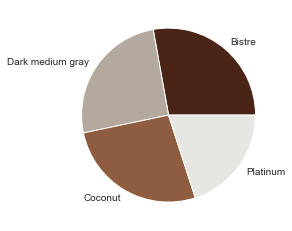

<Figure size 720x720 with 0 Axes>

In [71]:
labels = interior_df["name"]
plt.pie(interior_df["percent"],colors=np.array(centroids_array/255),labels=labels)
plt.figure(figsize=(10,10))
plt.show()



#labels=np.arange(len(centroids))

### complementary colors

In [73]:
get_compl_df = {"rgb_compl":[], "name_compl":[]}

#def get_complementary_name(i):
for i in centroids_array:
    compl_rgb = Color(i,"","")
#    print(complementaryColor(compl_rgb))
    #for i in complementaryColor(compl_rgb):
    get_compl_df["rgb_compl"].append(complementaryColor(compl_rgb))
    get_compl_df["name_compl"].append(get_colour_name2(complementaryColor(compl_rgb)))
    #return get_compl_df["name_compl"]
    
print(get_compl_df["name_compl"])
#cant divide the library /255, so each item in output list /255

['Japanese indigo', 'Cadet grey', 'Queen blue', 'Platinum']


In [74]:
#get_complementary_name(i)

In [77]:
interior_df["centroid_compl"] = get_compl_df["rgb_compl"]

In [78]:
interior_df["name_compl"] = get_compl_df["name_compl"]

In [79]:
interior_df.head()

,cluster,centroid,percent,name,centroid_compl,name_compl
0,0,"(74, 37, 23)",0.278344,Bistre,"[23, 60, 74]",Japanese indigo
1,1,"(180, 169, 158)",0.254646,Dark medium gray,"[158, 169, 180]",Cadet grey
2,2,"(142, 92, 62)",0.266711,Coconut,"[62, 112, 142]",Queen blue
3,3,"(230, 231, 226)",0.200299,Platinum,"[227, 226, 231]",Platinum


In [85]:
centroids_compl_array = np.asarray([np.asarray(i) for i in get_compl_df["rgb_compl"]])

In [86]:
centroids_compl_array

array([[ 23,  60,  74],
       [158, 169, 180],
       [ 62, 112, 142],
       [227, 226, 231]])

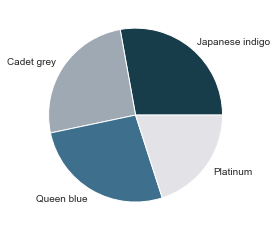

<Figure size 720x720 with 0 Axes>

In [89]:
labels = interior_df["name_compl"]
plt.pie(interior_df["percent"],colors=np.array(centroids_compl_array/255),labels=labels)
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
230, 231, 226